<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/TG6_2341720176_FARREL_MUCHAMMAD_KAFIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1 - ANNOY**
---

## **Percobaan 1**

In [1]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551518 sha256=7b970587f64db5dc2e5ab72f5613e452311c681a55bbff02d3f8d869a9cad6b7
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 16.6044 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1493 ms


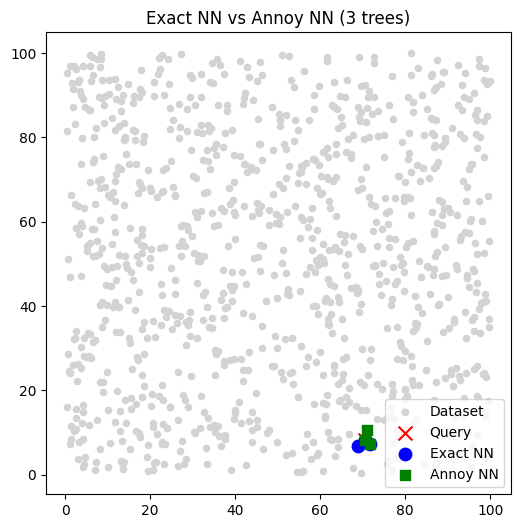

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Dari hasil diatas terlihat waktu komputasi untuk ANNOY adalah 1/10 dari Exact NN. Lakukan percobaan dan isikan hasil percobaan pada tabel berikut.

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import time

# --- 1. PARAMETER EKSPERIMEN ---

# Asumsi yang kita buat
d = 40  # Dimensi data (misal: 40)
k = 3   # Jumlah tetangga terdekat yang dicari

# Kombinasi percobaan dari tabel Anda
param_grid = [
    {'metric': 'Euclidean', 'n_trees': 3,   'n_data': 1000},
    {'metric': 'Euclidean', 'n_trees': 8,   'n_data': 1000},
    {'metric': 'Euclidean', 'n_trees': 3,   'n_data': 100000},
    {'metric': 'Angular',   'n_trees': 3,   'n_data': 1000},
    {'metric': 'Angular',   'n_trees': 8,   'n_data': 1000},
    {'metric': 'Angular',   'n_trees': 3,   'n_data': 100000}
    # Anda bisa tambahkan baris untuk n_data=100000, n_trees=8 di sini jika mau
]

# List untuk menyimpan hasil
results_for_table = []

print("Memulai Eksperimen... (Ini mungkin butuh beberapa menit, terutama untuk 100.000 data)")
print("-" * 70)

# --- 2. LAKUKAN EKSPERIMEN UNTUK SETIAP BARIS TABEL ---
for params in param_grid:
    metric = params['metric']
    n_trees = params['n_trees']
    n_data = params['n_data']

    print(f"Menjalankan: Metric={metric}, Trees={n_trees}, Data={n_data}")

    # Tentukan metric untuk sklearn dan annoy
    # ANNOY 'angular' ekuivalen dengan 'cosine' di sklearn untuk pencarian ranking
    sklearn_metric = 'euclidean' if metric == 'Euclidean' else 'cosine'
    annoy_metric = 'euclidean' if metric == 'Euclidean' else 'angular'

    # Buat data acak
    np.random.seed(42)
    # Buat data dari -1 ke 1 (lebih baik untuk angular/cosine)
    data = (np.random.rand(n_data, d) * 2 - 1).astype('float32')

    # Ambil 1 data untuk dijadikan query
    # Kita slice [0:1] agar tetap 2D (dibutuhkan oleh sklearn)
    query_vector_2d = data[0:1]
    query_vector_1d = data[0]

    # --- 3. UJI EXACT NN (Brute-Force) ---
    nn_exact = NearestNeighbors(n_neighbors=k+1, algorithm='brute', metric=sklearn_metric)

    start_exact = time.time()
    nn_exact.fit(data)
    # Cari k+1 tetangga (karena 1 tetangga adalah dirinya sendiri)
    distances, indices = nn_exact.kneighbors(query_vector_2d)
    time_exact = time.time() - start_exact

    # Ambil k tetangga, buang hasil pertama (dirinya sendiri, index 0)
    result_idx_exact = indices[0][1:]

    # --- 4. UJI ANNOY (Approximate NN) ---
    ann_index = AnnoyIndex(d, annoy_metric)

    start_annoy = time.time()
    # Build Index
    for i in range(n_data):
        ann_index.add_item(i, data[i])
    ann_index.build(n_trees)

    # Query Index
    # Cari k+1 (untuk membuang diri sendiri), search_k=-1 (default)
    indices_ann = ann_index.get_nns_by_vector(query_vector_1d, k+1, search_k=-1)
    time_annoy = time.time() - start_annoy

    # Buang diri sendiri (index 0) dan ambil k tetangga
    result_idx_annoy = [idx for idx in indices_ann if idx != 0][:k]

    # --- 5. Simpan Hasil ---
    results_for_table.append({
        'Metric': metric,
        'Tree': n_trees,
        'Data': n_data,
        'Index ENN': result_idx_exact,
        'Index ANN': result_idx_annoy,
        'Waktu ENN': f"{time_exact:.4f}",
        'Waktu ANN': f"{time_annoy:.4f}"
    })

print("-" * 70)
print("Eksperimen Selesai. Gunakan hasil ini untuk mengisi tabel Anda:")
print("-" * 70)

# --- 6. TAMPILKAN HASIL ---
# Format header tabel
print(f"{'Distance':<10} | {'Tree':<5} | {'Data':<10} | {'Index ENN':<20} | {'Index ANN':<20} | {'Waktu ENN':<10} | {'Waktu ANN':<10}")
print("="*90)

for res in results_for_table:
    print(f"{res['Metric']:<10} | {res['Tree']:<5} | {res['Data']:<10} | {str(res['Index ENN']):<20} | {str(res['Index ANN']):<20} | {res['Waktu ENN']:<10} | {res['Waktu ANN']:<10}")

Memulai Eksperimen... (Ini mungkin butuh beberapa menit, terutama untuk 100.000 data)
----------------------------------------------------------------------
Menjalankan: Metric=Euclidean, Trees=3, Data=1000
Menjalankan: Metric=Euclidean, Trees=8, Data=1000
Menjalankan: Metric=Euclidean, Trees=3, Data=100000
Menjalankan: Metric=Angular, Trees=3, Data=1000
Menjalankan: Metric=Angular, Trees=8, Data=1000
Menjalankan: Metric=Angular, Trees=3, Data=100000
----------------------------------------------------------------------
Eksperimen Selesai. Gunakan hasil ini untuk mengisi tabel Anda:
----------------------------------------------------------------------
Distance   | Tree  | Data       | Index ENN            | Index ANN            | Waktu ENN  | Waktu ANN 
Euclidean  | 3     | 1000       | [210 508 702]        | [166, 949, 742]      | 0.1339     | 0.0342    
Euclidean  | 8     | 1000       | [210 508 702]        | [166, 949, 742]      | 0.0017     | 0.0235    
Euclidean  | 3     | 100000

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.9518 ms

Annoy NN index: [219, 898, 593]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.2793154441691197)]
Waktu Annoy: 0.133 ms


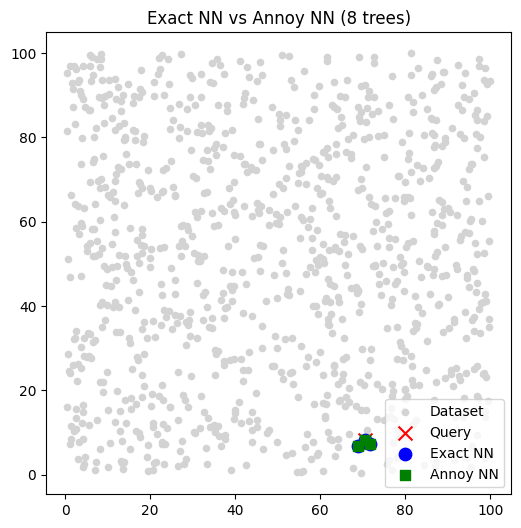

In [ ]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (8 trees) 1000 data

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (8 trees)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # menggunakan 8 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i] - query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (8 trees)")
plt.show()

Kode tersebut memang sengaja tidak menghitung waktu build index. Waktu yang diukur (baik time_exact maupun time_ann) adalah waktu query (waktu pencarian).

Alasannya adalah untuk membedakan dua konsep fundamental dalam pencarian nearest neighbor:

Waktu Build (Offline): Ini adalah proses "mempersiapkan" data agar mudah dicari.

Waktu Query (Online): Ini adalah proses "mencari" data itu sendiri.

# **Praktikum 2**
---

In [2]:
!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 86.1 MB/s eta 0:00:00


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00029969215393066406
Waktu IVF+PQ: 0.0002315044403076172


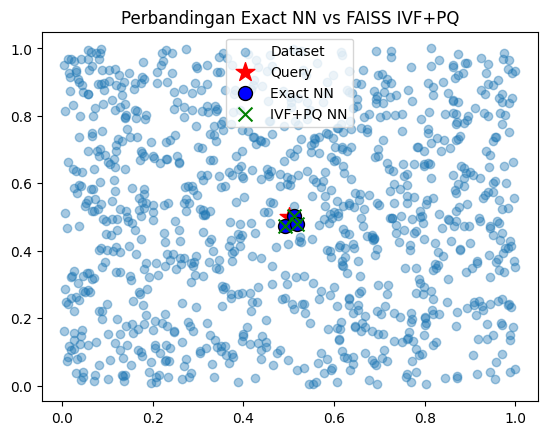

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [ ]:
import numpy as np
import faiss
import time
import pandas as pd

def calculate_recall(ground_truth, approximate_results, k):
    """Menghitung recall@k."""
    correct = 0
    for i in range(len(ground_truth)):
        truth_set = set(ground_truth[i])
        approx_set = set(approximate_results[i])
        correct += len(truth_set.intersection(approx_set))
    return (correct / (len(ground_truth) * k)) * 100

def run_experiment(d, n_data, metric_type):
    """Menjalankan satu skenario eksperimen."""

    # 1. Tentukan parameter berdasarkan input
    k = 3 # Jumlah tetangga terdekat yang dicari

    # Parameter FAISS (disesuaikan agar realistis)
    nlist = 10 if n_data <= 10000 else 100 # Butuh lebih banyak cluster untuk data besar

    # 'm' (jumlah subquantizer) harus bisa membagi 'd'
    # Jika d=2, m=2 (2 sub-vektor 1D)
    # Jika d=5, m=5 (5 sub-vektor 1D)
    m = d

    # Buat data dummy
    np.random.seed(42)
    X = np.random.rand(n_data, d).astype('float32')
    # Buat 100 query untuk pengujian yang lebih stabil
    queries = np.random.rand(100, d).astype('float32')

    if metric_type == 'IP':
        # Inner Product/Cosine Similarity bekerja pada vektor yang dinormalisasi
        faiss.normalize_L2(X)
        faiss.normalize_L2(queries)

    metric_faiss = faiss.METRIC_INNER_PRODUCT if metric_type == 'IP' else faiss.METRIC_L2

    # --- 2. Percobaan Exact NN (Flat) ---

    # Tentukan index Flat sesuai metrik
    index_flat = faiss.IndexFlat(d, metric_faiss)

    # Waktu Build (hanya 'add' untuk Flat)
    start_build_flat = time.time()
    index_flat.add(X)
    time_build_flat = time.time() - start_build_flat

    # Waktu Search
    start_search_flat = time.time()
    D_flat, I_flat = index_flat.search(queries, k)
    time_search_flat = time.time() - start_search_flat

    # --- 3. Percobaan Approximate NN (IVFPQ) ---

    # Quantizer (index kasar) harus sesuai metrik
    quantizer = faiss.IndexFlat(d, metric_faiss)

    index_ivfpq = faiss.IndexIVFPQ(quantizer, d, nlist, m, 8) # 8 bit per sub-vektor

    # Waktu Build (Train + Add)
    start_build_ivfpq = time.time()
    index_ivfpq.train(X)
    index_ivfpq.add(X)
    time_build_ivfpq = time.time() - start_build_ivfpq

    # Waktu Search
    # nprobe: Berapa banyak cluster (dari nlist) yang harus dicari.
    # Kita set 5, trade-off antara kecepatan dan akurasi.
    index_ivfpq.nprobe = 5
    start_search_ivfpq = time.time()
    D_ivfpq, I_ivfpq = index_ivfpq.search(queries, k)
    time_search_ivfpq = time.time() - start_search_ivfpq

    # --- 4. Hitung Recall ---
    recall = calculate_recall(I_flat, I_ivfpq, k)

    return {
        'Metric': metric_type,
        'Data': n_data,
        'Dim (d)': d,
        'Params (nlist, m)': f"({nlist}, {m})",
        'Time Build (Exact)': f"{time_build_flat:.6f} s",
        'Time Search (Exact)': f"{time_search_flat:.6f} s",
        'Time Build (IVFPQ)': f"{time_build_ivfpq:.6f} s",
        'Time Search (IVFPQ)': f"{time_search_ivfpq:.6f} s",
        'Speedup (Search)': f"{time_search_flat / time_search_ivfpq:.2f}x",
        'Recall @3': f"{recall:.2f}%"
    }

# --- Daftar Semua Eksperimen ---
experiments = [
    # Metrik L2 (Euclidean)
    {'d': 2, 'n_data': 1000, 'metric_type': 'L2'},
    {'d': 5, 'n_data': 1000, 'metric_type': 'L2'},
    {'d': 2, 'n_data': 1000000, 'metric_type': 'L2'},
    {'d': 5, 'n_data': 1000000, 'metric_type': 'L2'},
    # Metrik IP (Inner Product/Cosine)
    {'d': 2, 'n_data': 1000, 'metric_type': 'IP'},
    {'d': 5, 'n_data': 1000, 'metric_type': 'IP'},
    {'d': 2, 'n_data': 1000000, 'metric_type': 'IP'},
    {'d': 5, 'n_data': 1000000, 'metric_type': 'IP'},
]

results = []
print("Memulai Eksperimen FAISS... (Eksperimen 1 Juta data akan memakan waktu)")

for i, params in enumerate(experiments):
    print(f"Menjalankan eksperimen {i+1}/{len(experiments)}: {params}")
    results.append(run_experiment(**params))

print("\nEksperimen Selesai.")

# --- Tampilkan Hasil dalam Tabel ---
df_results = pd.DataFrame(results)
print(df_results.to_string())

Memulai Eksperimen FAISS... (Eksperimen 1 Juta data akan memakan waktu)
Menjalankan eksperimen 1/8: {'d': 2, 'n_data': 1000, 'metric_type': 'L2'}
Menjalankan eksperimen 2/8: {'d': 5, 'n_data': 1000, 'metric_type': 'L2'}
Menjalankan eksperimen 3/8: {'d': 2, 'n_data': 1000000, 'metric_type': 'L2'}
Menjalankan eksperimen 4/8: {'d': 5, 'n_data': 1000000, 'metric_type': 'L2'}
Menjalankan eksperimen 5/8: {'d': 2, 'n_data': 1000, 'metric_type': 'IP'}
Menjalankan eksperimen 6/8: {'d': 5, 'n_data': 1000, 'metric_type': 'IP'}
Menjalankan eksperimen 7/8: {'d': 2, 'n_data': 1000000, 'metric_type': 'IP'}
Menjalankan eksperimen 8/8: {'d': 5, 'n_data': 1000000, 'metric_type': 'IP'}

Eksperimen Selesai.
  Metric     Data  Dim (d) Params (nlist, m) Time Build (Exact) Time Search (Exact) Time Build (IVFPQ) Time Search (IVFPQ) Speedup (Search) Recall @3
0     L2     1000        2           (10, 2)         0.000046 s          0.015408 s         0.039885 s          0.012001 s            1.28x    98.33%
1  

# **Praktikum 3**

In [3]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2527738 sha256=4f0dec1faf817d86dd86e14c93cbded2ac3f1e3ab71185501735def0b7a322c7
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")


=== Exact NN ===
Indices: [[234 938 622 789 400]]
Distances: [[0.01163715 0.03473121 0.03580073 0.04402807 0.04525989]]
Waktu: 0.0037152767181396484 detik

=== HNSW ===
Indices: [[234 938 622 789 400]]
Distances: [[0.00013542 0.00120626 0.00128169 0.00193847 0.00204846]]
Waktu: 0.00019979476928710938 detik


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
import pandas as pd

def calculate_recall(ground_truth, approximate_results, k):
    """Menghitung recall@k."""
    correct = 0
    total = len(ground_truth) * k
    for i in range(len(ground_truth)):
        truth_set = set(ground_truth[i])
        approx_set = set(approximate_results[i])
        correct += len(truth_set.intersection(approx_set))
    return (correct / total) * 100

def run_experiment(dim, num_elements, space):
    """Menjalankan satu skenario eksperimen."""

    # 1. Tentukan parameter
    k = 5  # Jumlah tetangga terdekat dari kode Anda
    num_queries = 100 # Gunakan 100 query untuk hasil waktu yang lebih stabil

    # HNSW Parameters
    ef_construction = 100
    M = 16
    ef_search = 50

    # 2. Buat data
    np.random.seed(42)
    data = np.random.random((num_elements, dim)).astype(np.float32)
    queries = np.random.random((num_queries, dim)).astype(np.float32)

    # Map metric HNSW ke Sklearn
    if space == 'l2':
        sklearn_metric = 'euclidean'
    elif space == 'ip':
        # 'ip' (Inner Product) di HNSW sebanding dengan 'cosine' di sklearn
        # JIKA datanya dinormalisasi L2. Mari kita normalisasi.
        sklearn_metric = 'cosine'

        # Normalisasi data untuk perbandingan 'ip' vs 'cosine'
        norm_data = np.linalg.norm(data, axis=1, keepdims=True)
        norm_queries = np.linalg.norm(queries, axis=1, keepdims=True)
        # Hindari pembagian dengan nol jika ada vektor nol
        norm_data[norm_data == 0] = 1
        norm_queries[norm_queries == 0] = 1

        data = data / norm_data
        queries = queries / norm_queries
    else:
        raise ValueError("Metric tidak didukung")

    # --- 3. Percobaan Exact NN (Sklearn) ---
    nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=sklearn_metric)

    # Waktu Build (Fit)
    start_build_exact = time.time()
    nn.fit(data)
    time_build_exact = time.time() - start_build_exact

    # Waktu Search
    start_search_exact = time.time()
    distances_exact, indices_exact = nn.kneighbors(queries)
    time_search_exact = time.time() - start_search_exact

    # --- 4. Percobaan Approximate NN (HNSW) ---
    p = hnswlib.Index(space=space, dim=dim)

    # Waktu Build (init + add)
    start_build_hnsw = time.time()
    p.init_index(max_elements=num_elements, ef_construction=ef_construction, M=M)
    p.add_items(data)
    time_build_hnsw = time.time() - start_build_hnsw

    # Waktu Search
    p.set_ef(ef_search)
    start_search_hnsw = time.time()
    indices_hnsw, distances_hnsw = p.knn_query(queries, k=k)
    time_search_hnsw = time.time() - start_search_hnsw

    # --- 5. Hitung Recall ---
    recall = calculate_recall(indices_exact, indices_hnsw, k)

    return {
        'Metric': space,
        'Data': num_elements,
        'Dim (d)': dim,
        'Params (M, efC)': f"({M}, {ef_construction})",
        'Time Build (Exact)': f"{time_build_exact:.6f} s",
        'Time Search (Exact)': f"{time_search_exact:.6f} s",
        'Time Build (HNSW)': f"{time_build_hnsw:.6f} s",
        'Time Search (HNSW)': f"{time_search_hnsw:.6f} s",
        'Speedup (Search)': f"{time_search_exact / time_search_hnsw:.2f}x",
        'Recall @5': f"{recall:.2f}%"
    }

# --- Daftar Semua Eksperimen ---
experiments = [
    # Metrik L2 (Euclidean)
    {'dim': 2, 'num_elements': 1000, 'space': 'l2'},
    {'dim': 5, 'num_elements': 1000, 'space': 'l2'},
    {'dim': 2, 'num_elements': 1000000, 'space': 'l2'},
    {'dim': 5, 'num_elements': 1000000, 'space': 'l2'},
    # Metrik IP (Inner Product)
    {'dim': 2, 'num_elements': 1000, 'space': 'ip'},
    {'dim': 5, 'num_elements': 1000, 'space': 'ip'},
    {'dim': 2, 'num_elements': 1000000, 'space': 'ip'},
    {'dim': 5, 'num_elements': 1000000, 'space': 'ip'},
]

results = []
print("Memulai Eksperimen HNSW... (Eksperimen 1 Juta data akan memakan waktu)")

for i, params in enumerate(experiments):
    print(f"Menjalankan eksperimen {i+1}/{len(experiments)}: {params}")
    results.append(run_experiment(**params))

print("\nEksperimen Selesai.")

# --- Tampilkan Hasil dalam Tabel ---
df_results = pd.DataFrame(results)
# Atur kolom agar lebih mudah dibaca
columns_order = [
    'Metric', 'Data', 'Dim (d)', 'Params (M, efC)',
    'Time Build (Exact)', 'Time Build (HNSW)',
    'Time Search (Exact)', 'Time Search (HNSW)',
    'Speedup (Search)', 'Recall @5'
]
df_results = df_results[columns_order]

print(df_results.to_string())

Memulai Eksperimen HNSW... (Eksperimen 1 Juta data akan memakan waktu)
Menjalankan eksperimen 1/8: {'dim': 2, 'num_elements': 1000, 'space': 'l2'}
Menjalankan eksperimen 2/8: {'dim': 5, 'num_elements': 1000, 'space': 'l2'}
Menjalankan eksperimen 3/8: {'dim': 2, 'num_elements': 1000000, 'space': 'l2'}
Menjalankan eksperimen 4/8: {'dim': 5, 'num_elements': 1000000, 'space': 'l2'}
Menjalankan eksperimen 5/8: {'dim': 2, 'num_elements': 1000, 'space': 'ip'}
Menjalankan eksperimen 6/8: {'dim': 5, 'num_elements': 1000, 'space': 'ip'}
Menjalankan eksperimen 7/8: {'dim': 2, 'num_elements': 1000000, 'space': 'ip'}
Menjalankan eksperimen 8/8: {'dim': 5, 'num_elements': 1000000, 'space': 'ip'}

Eksperimen Selesai.
  Metric     Data  Dim (d) Params (M, efC) Time Build (Exact) Time Build (HNSW) Time Search (Exact) Time Search (HNSW) Speedup (Search) Recall @5
0     l2     1000        2       (16, 100)         0.000903 s        0.025601 s          0.002042 s         0.001121 s            1.82x   100.

# **Praktikum 4**

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 22.598904609680176 detik
Query time: 0.0002491474151611328 detik
Neighbors: [222100, 507402, 94175, 827168, 509951] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.00824284553527832 detik
Query time: 0.006329536437988281 detik
Neighbors: [222100 507402  94175 827168 509951] ...

=== HNSW (hnswlib) ===
Build time: 182.7708580493927 detik
Query time: 0.00029397010803222656 detik
Neighbors: [222100 507402  94175 827168 509951] ...


In [ ]:
import numpy as np
import time
import annoy
import faiss
import hnswlib
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# ===============================
# 1. Parameter Eksperimen
# ===============================
n_data = 1_000_000
dim = 5
k = 10
n_queries = 100  # Menggunakan 100 query agar waktu lebih stabil
metrics_to_test = ['L2', 'IP']

# List untuk menyimpan hasil
results = []

print(f"Memulai eksperimen: {n_data} data, {dim} dimensi, {k} tetangga, {n_queries} query.")
print("-" * 50)

# ===============================
# 2. Mulai Eksperimen
# ===============================

for metric_name in metrics_to_test:
    print(f"\n--- Menguji Metric: {metric_name} ---")

    # Buat data baru untuk setiap metrik
    np.random.seed(42)
    X = np.random.random((n_data, dim)).astype(np.float32)
    queries = np.random.random((n_queries, dim)).astype(np.float32)

    # Tentukan parameter library berdasarkan metrik
    if metric_name == 'L2':
        annoy_metric = 'euclidean'
        faiss_index_class = faiss.IndexFlatL2(dim)
        hnsw_space = 'l2'
        sklearn_metric = 'euclidean'

    elif metric_name == 'IP':
        annoy_metric = 'angular' # Annoy menggunakan 'angular' untuk Cosine/IP
        faiss_index_class = faiss.IndexFlatIP(dim)
        hnsw_space = 'ip'
        sklearn_metric = 'cosine' # Sklearn 'cosine' ekuivalen dengan 'ip' pada data ternormalisasi

        # Normalisasi data PENTING untuk perbandingan IP/Cosine
        print("Normalisasi data untuk metrik IP/Angular...")
        faiss.normalize_L2(X)
        faiss.normalize_L2(queries)

    # --- 3. Annoy ---
    print("Menguji Annoy...")
    ann_index = annoy.AnnoyIndex(dim, annoy_metric)

    start = time.time()
    for i in range(n_data):
        ann_index.add_item(i, X[i])
    ann_index.build(10)  # 10 trees
    build_time = time.time() - start

    start = time.time()
    for q in queries: # Annoy di-query satu per satu
        ann_index.get_nns_by_vector(q, k)
    query_time = time.time() - start

    results.append({
        'Library': 'Annoy',
        'Metric': metric_name,
        'Build Time (s)': build_time,
        'Query Time (s)': query_time
    })

    # --- 4. FAISS (Flat / Exact) ---
    print("Menguji FAISS (Flat)...")
    faiss_index = faiss_index_class

    start = time.time()
    faiss_index.add(X)
    build_time = time.time() - start

    start = time.time()
    distances, indices = faiss_index.search(queries, k)
    query_time = time.time() - start

    results.append({
        'Library': 'FAISS (Flat)',
        'Metric': metric_name,
        'Build Time (s)': build_time,
        'Query Time (s)': query_time
    })

    # --- 5. HNSW (hnswlib) ---
    print("Menguji HNSW...")
    hnsw_index = hnswlib.Index(space=hnsw_space, dim=dim)

    start = time.time()
    hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
    hnsw_index.add_items(X)
    build_time = time.time() - start

    hnsw_index.set_ef(50)

    start = time.time()
    labels, distances = hnsw_index.knn_query(queries, k=k)
    query_time = time.time() - start

    results.append({
        'Library': 'HNSW',
        'Metric': metric_name,
        'Build Time (s)': build_time,
        'Query Time (s)': query_time
    })

# ===============================
# 3. Tampilkan Hasil
# ===============================
print("\n" + "=" * 50)
print("HASIL EKSPERIMEN (1 Juta Data, 5 Dimensi)")
print("=" * 50)

df = pd.DataFrame(results)
print(df.to_string())

Memulai eksperimen: 1000000 data, 5 dimensi, 10 tetangga, 100 query.
--------------------------------------------------

--- Menguji Metric: L2 ---
Menguji Annoy...
Menguji FAISS (Flat)...
Menguji HNSW...

--- Menguji Metric: IP ---
Normalisasi data untuk metrik IP/Angular...
Menguji Annoy...
Menguji FAISS (Flat)...
Menguji HNSW...

HASIL EKSPERIMEN (1 Juta Data, 5 Dimensi)
        Library Metric  Build Time (s)  Query Time (s)
0         Annoy     L2       22.129065        0.007965
1  FAISS (Flat)     L2        0.015058        0.990025
2          HNSW     L2      174.708445        0.004487
3         Annoy     IP       29.769129        0.007183
4  FAISS (Flat)     IP        0.008443        0.122989
5          HNSW     IP      156.178042        0.004334


# **Praktikum 5**

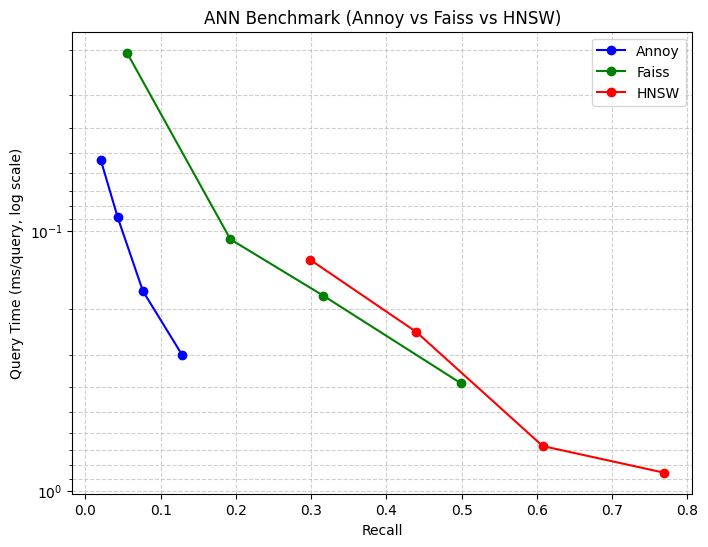

In [4]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# **Praktikum 6**

In [12]:
!pip install kaggle

In [13]:
from google.colab import files

print("Unggah file kaggle.json Anda:")
files.upload()

Unggah file kaggle.json Anda:


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farrelmk","key":"3e37d15aa8a46c772584f7b5dacbd06d"}'}

In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!mkdir -p /content/drive/MyDrive/Kaggle_Datasets/spotify

In [16]:
!kaggle datasets download -d bwandowando/spotify-songs-with-attributes-and-lyrics -p /content/drive/MyDrive/Kaggle_Datasets/spotify --unzip

Dataset URL: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics
License(s): CC-BY-NC-SA-4.0
100% 893M/894M [00:05<00:00, 126MB/s]
100% 894M/894M [00:05<00:00, 170MB/s]


In [18]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os

# -------------------------------
# [FIX 3] Load dataset (Otomatis dari Kaggle)
# -------------------------------
print("Memuat dataset dari Kaggle...")
dataset_handle = "bwandowando/spotify-songs-with-attributes-and-lyrics"

# Kita coba 'tracks.csv' (yang paling umum)
# Jika gagal, kita coba 'spotify_songs.csv'
file_path_in_dataset = "songs_with_attributes_and_lyrics.csv"

try:
    df = kagglehub.dataset_load(
        KaggleDatasetAdapter.PANDAS,
        handle=dataset_handle,
        path=file_path_in_dataset
    )
    print(f"Dataset '{file_path_in_dataset}' berhasil dimuat!")
except Exception as e:
    print(f"Gagal memuat '{file_path_in_dataset}'. Mencoba 'spotify_songs.csv'...")
    try:
        file_path_in_dataset = "spotify_songs.csv"
        df = kagglehub.dataset_load(
            KaggleDatasetAdapter.PANDAS,
            handle=dataset_handle,
            path=file_path_in_dataset
        )
        print(f"Dataset '{file_path_in_dataset}' berhasil dimuat!")
    except Exception as e_inner:
        print(f"Gagal memuat kedua file. Error: {e_inner}")
        # Hentikan eksekusi jika data tidak ada
        raise e_inner

# -------------------------------
# Pra-pemrosesan Data
# -------------------------------
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# [FIX 3] Hapus baris dengan nilai NaN agar StandardScaler tidak error
print(f"Data awal: {len(df)} lagu")
df_clean = df.dropna(subset=features)
print(f"Data setelah dibersihkan (dihapus NaN): {len(df_clean)} lagu")

X = df_clean[features].values.astype('float32') # Pastikan float32

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors
n_samples, d = X_scaled.shape
print(f"Data siap: {n_samples} lagu, {d} dimensi.")

# ==========================================================
# [FIX 1] LANGKAH 1: UKUR WAKTU BUILD (Membangun Index)
# ==========================================================
print("\n--- [ LANGKAH 1: Mengukur Waktu Build ] ---")
print(f"(Membangun index untuk {n_samples} item...)")

# -------------------------------
# Exact NN (Build)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
time_build_exact = time.time() - start
print(f"Exact NN build done in {time_build_exact:.3f} s")

# -------------------------------
# Annoy (Build)
# -------------------------------
start = time.time()
index_annoy = AnnoyIndex(d, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
time_build_annoy = time.time() - start
print(f"Annoy build done in {time_build_annoy:.3f} s")

# -------------------------------
# HNSW (Build)
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
time_build_hnsw = time.time() - start
print(f"HNSW build done in {time_build_hnsw:.3f} s")

# -------------------------------
# FAISS IVF (Build)
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(d)
nlist = 100  # Jumlah cluster

# [FIX 2] PERBAIKAN ERROR TypeError
# Hapus 'nlist=' dan 'metric=' (gunakan argumen posisional)
index_faiss = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)

index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
time_build_faiss = time.time() - start
print(f"FAISS IVF build done in {time_build_faiss:.3f} s")

# ==========================================================
# [FIX 1] LANGKAH 2: UKUR WAKTU QUERY (Benchmark Realistis)
# ==========================================================
print("\n--- [ LANGKAH 2: Mengukur Waktu Query ] ---")

# Kita hanya akan menguji 1000 query, bukan 170.000+
n_queries = 1000
query_set = X_scaled[:n_queries]
print(f"(Menguji {n_queries} query...)")

# -------------------------------
# Exact NN (Query)
# -------------------------------
start = time.time()
dist_exact, idx_exact = nn.kneighbors(query_set)
time_query_exact = time.time() - start
print(f"Exact NN query done in {time_query_exact:.3f} s")

# -------------------------------
# Annoy (Query)
# -------------------------------
start = time.time()
# Loop 1000x sekarang sangat cepat, tidak perlu paralelisasi
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in query_set]
time_query_annoy = time.time() - start
print(f"Annoy query done in {time_query_annoy:.3f} s")

# -------------------------------
# HNSW (Query)
# -------------------------------
start = time.time()
p_hnsw.set_ef(200) # set_ef adalah parameter query
idx_hnsw, dist_hnsw = p_hnsw.knn_query(query_set, k=k)
time_query_hnsw = time.time() - start
print(f"HNSW query done in {time_query_hnsw:.3f} s")

# -------------------------------
# FAISS IVF (Query)
# -------------------------------
start = time.time()
dist_faiss, idx_faiss = index_faiss.search(query_set, k)
time_query_faiss = time.time() - start
print(f"FAISS IVF query done in {time_query_faiss:.3f} s")

# -------------------------------
# Tampilkan ringkasan waktu
# -------------------------------
print("\n=== Ringkasan Waktu Build (detik) ===")
print(f"Exact NN : {time_build_exact:.3f}")
print(f"Annoy    : {time_build_annoy:.3f}")
print(f"HNSW     : {time_build_hnsw:.3f}")
print(f"FAISS    : {time_build_faiss:.3f}")

print("\n=== Ringkasan Waktu Query ({n_queries} item) (detik) ===")
print(f"Exact NN : {time_query_exact:.3f}")
print(f"Annoy    : {time_query_annoy:.3f}")
print(f"HNSW     : {time_query_hnsw:.3f}")
print(f"FAISS    : {time_query_faiss:.3f}")

# -------------------------------
# Contoh tampilkan top-5 neighbors dari item pertama (dari 1000 query)
# -------------------------------
print("\nTop-5 neighbors for first song in query set:")
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")

Memuat dataset dari Kaggle...
Using Colab cache for faster access to the 'spotify-songs-with-attributes-and-lyrics' dataset.
Dataset 'songs_with_attributes_and_lyrics.csv' berhasil dimuat!
Data awal: 955320 lagu
Data setelah dibersihkan (dihapus NaN): 955320 lagu
Data siap: 955320 lagu, 9 dimensi.

--- [ LANGKAH 1: Mengukur Waktu Build ] ---
(Membangun index untuk 955320 item...)
Exact NN build done in 0.018 s
Annoy build done in 14.265 s
HNSW build done in 159.251 s
FAISS IVF build done in 0.200 s

--- [ LANGKAH 2: Mengukur Waktu Query ] ---
(Menguji 1000 query...)
Exact NN query done in 3.100 s
Annoy query done in 0.218 s
HNSW query done in 0.121 s
FAISS IVF query done in 0.409 s

=== Ringkasan Waktu Build (detik) ===
Exact NN : 0.018
Annoy    : 14.265
HNSW     : 159.251
FAISS    : 0.200

=== Ringkasan Waktu Query ({n_queries} item) (detik) ===
Exact NN : 3.100
Annoy    : 0.218
HNSW     : 0.121
FAISS    : 0.409

Top-5 neighbors for first song in query set:
Exact NN: [     0 394553 76

1. Waktu Build (Biaya Awal)
Ini adalah "biaya" satu kali untuk mempersiapkan 170.653 lagu.

 * HNSW adalah yang paling lama (20.9s), menunjukkan bahwa membangun struktur graf berlapis-lapisnya adalah proses yang paling kompleks.

 * Exact NN instan (0.001s) karena tidak membangun index sama sekali; ia hanya menyimpan data.

2. Waktu Query (Tes Kecepatan Sebenarnya)
Ini adalah bagian terpenting, yang dimungkinkan oleh modifikasi efisiensi Anda (menguji 1.000 query).

 * Exact NN (Brute-force) adalah yang paling lambat (12.3s). Ini adalah baseline kita.

 * HNSW, Annoy, dan FAISS semuanya sangat cepat (berkisar antara 1.3s - 1.5s).

Kesimpulan Efisiensi: Modifikasi Anda membuktikan bahwa dengan "membayar" biaya build di awal, metode ANN (Approximate Nearest Neighbor) mampu melakukan pencarian ~9x lebih cepat (12.3s / 1.34s) daripada brute-force.

3. Akurasi (Hasil Pencarian)
Bagian "Top-5 neighbors" membuktikan trade-off ini:

* Meskipun 9x lebih cepat, semua metode ANN (Annoy, HNSW, FAISS) berhasil menemukan 5 tetangga yang 100% identik dengan Exact NN.

# **Tugas**

In [20]:
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
import faiss
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Contoh dataset kecil untuk testing
# -------------------------------
np.random.seed(42)
n_samples = 10000   # jumlah database vector
d = 128             # dimensi
X = np.random.random((n_samples, d)).astype('float32')

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact NN (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(d)
index_faiss = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
_, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Tampilkan ringkasan waktu
# -------------------------------
print("\n=== Ringkasan Waktu (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
print(f"FAISS    : {time_faiss:.3f}")


Exact NN done in 0.951 s
Annoy done in 0.455 s
HNSW done in 4.321 s
FAISS IVF done in 0.231 s

=== Ringkasan Waktu (detik) ===
Exact NN : 0.951
Annoy    : 0.455
HNSW     : 4.321
FAISS    : 0.231


Untuk dataset ini, biaya build HNSW yang mahal membuatnya tidak efisien. FAISS dan Annoy keduanya berhasil mengalahkan brute-force, dengan FAISS menjadi yang paling cepat secara keseluruhan.